In [1]:
DATA_PATH = 'F:/cvpr image/customdataset'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import os
import cv2

In [3]:
CATEGORIES = os.listdir(DATA_PATH)
CATEGORIES

['ABDULLAH AL SHAHRIAR',
 'MD TOYABUR RAHAMAN',
 'NAFIS MUBASSHIR SHAH',
 'SHEIKH AKIB ALMAS']

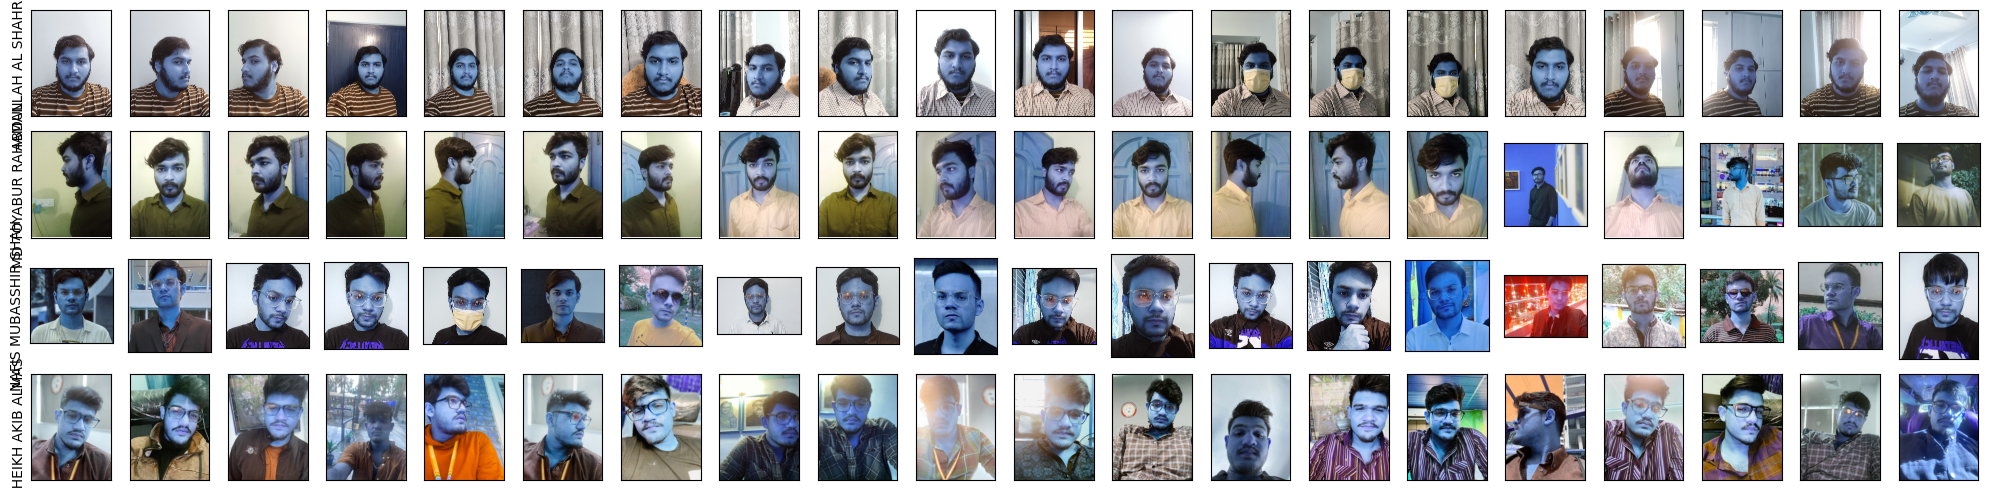

In [4]:
plt.figure(figsize=(20,5))
i=0
for c in CATEGORIES:
    path = os.path.join(DATA_PATH,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(4,20,i+1)
        plt.imshow(img_array)
        if i%20 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%20 == 0:
            break

plt.tight_layout()
plt.show()

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
TRAIN_DATA = []
img_size = 256

for j, c in enumerate(CATEGORIES):
    path = os.path.join(DATA_PATH, c)
    label = j
    for i in tqdm(os.listdir(path)):
        img = cv2.imread(os.path.join(path, i))
        img = cv2.resize(img, (img_size, img_size))
        TRAIN_DATA.append([img, label])

print(len(TRAIN_DATA))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 24.98it/s]

80


In [15]:
train_imgs=[]
train_labels=[]
for img, label in TRAIN_DATA:
  train_imgs.append(img)
  train_labels.append(label)

In [16]:
train_imgs_np=np.array(train_imgs)
train_labels_np=np.array(train_labels)
print(train_imgs_np.shape, train_labels_np.shape)

(80, 256, 256, 3) (80,)


In [23]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(img_size,img_size,3)),
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(7,7), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    ## output layer
    layers.Dense(4, activation='softmax')  # num_classes is the number of individuals you want to recognize
])

In [24]:
model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
h = model.fit(x=train_imgs_np, y=train_labels_np, epochs=55, validation_split=0.6, batch_size=32)

Epoch 1/55
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0000e+00 - loss: 39.6697 - val_accuracy: 0.0000e+00 - val_loss: 1451.6605
Epoch 2/55
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6250 - loss: 119.3205 - val_accuracy: 0.1667 - val_loss: 699.4321
Epoch 3/55
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3750 - loss: 179.0252 - val_accuracy: 0.1667 - val_loss: 263.7275
Epoch 4/55
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6875 - loss: 0.7235 - val_accuracy: 0.0000e+00 - val_loss: 286.2894
Epoch 5/55
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6250 - loss: 31.9302 - val_accuracy: 0.0000e+00 - val_loss: 154.3896
Epoch 6/55
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6250 - loss: 14.4913 - val_accuracy: 0.0625 - val_loss: 65.4285
Epoch 7/55
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8438 - loss: 0.3855 - val_accuracy: 0.1667 - val_loss: 49.4529
Epoch 8/55
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3750 - loss: 10.3044 - val_accuracy: 0.083

In [27]:
# Save the trained model
model.save('mask_detection_model.h5')
model = keras.models.load_model('mask_detection_model.h5')

In [ ]:

import cv2

import numpy as np

from tensorflow import keras

from tensorflow.keras import layers

import os
 
 
 
# Load your trained model here (replace 'your_model.h5' with the actual filename)


 
# Webcam

def detect_person():

    cap = cv2.VideoCapture(0)  # Use 0 for the default webcam
 
    while True:

        ret, frame = cap.read()

        if not ret:

            print("Failed to grab frame")

            break
 
        # Preprocess the frame

        resized_frame = cv2.resize(frame, (img_size, img_size))

        normalized_frame = resized_frame / 255.0  # Normalize pixel values

        input_data = np.expand_dims(normalized_frame, axis=0)
 
        # Predict using the loaded model

        prediction = model.predict(input_data)
        print("Raw Predictions:", prediction)
 
        # Get the label with the highest probability

        predicted_label = np.argmax(prediction)
 
        # Display the result on the frame

        if prediction[0, predicted_label] > 0.5:  # Adjust the threshold as needed

            name = CATEGORIES[predicted_label]

            cv2.putText(frame, f"Person: {name}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

        else:

            cv2.putText(frame, "Not Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
 
        # Display the frame

        cv2.imshow('Person Detection', frame)
 
        if cv2.waitKey(1) & 0xFF == ord('q'):

            break
 
    cap.release()

    cv2.destroyAllWindows()
 
# Run person detection on webcam

detect_person()
